In [20]:
import pandas as pd
df=pd.read_csv("clustering.csv")
df.head()
df=df.drop("Loan_ID",axis=1)


In [21]:
df.Gender=df.Gender.fillna("Male")
df.Self_Employed=df.Self_Employed.fillna("No")
df.Loan_Amount_Term=df.Loan_Amount_Term.median()
df.Credit_History=df.Credit_History.median()
df=df.drop("Dependents",axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [49]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.Gender=label.fit_transform(df.Gender)
df.Married=label.fit_transform(df.Married)
df.Education=label.fit_transform(df.Education)
df.Self_Employed=label.fit_transform(df.Self_Employed)
df.Property_Area=label.fit_transform(df.Property_Area)
df.Loan_Status=label.fit_transform(df.Loan_Status)
df.head()
x=df.drop("Loan_Status",axis=1)
x
y=df.Loan_Status

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators='warn')
model.fit(x_train,y_train)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
yy=model.predict(x_test)

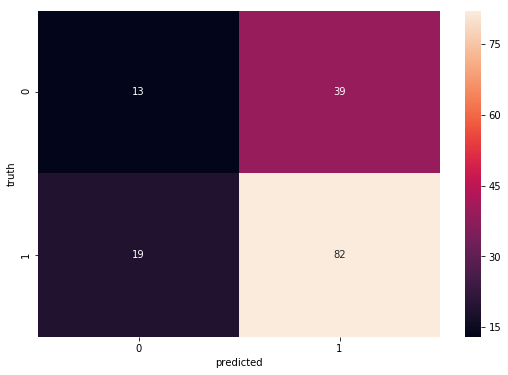

0.6209150326797386

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yy)
cm
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(9,6))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()
model.score(x_test,y_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
model1.predict(x_test)
model1.score(x_test,y_test)

0.6274509803921569